In [1]:
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, AveragePooling2D, Flatten, ZeroPadding3D, ZeroPadding2D
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print(f'length of the train dataset is {x_train.shape[0]} and test dataset is {x_test.shape[0]}')

length of the train dataset is 60000 and test dataset is 10000


In [4]:
max_value = np.max(x_train[0])
x_train = x_train/max_value
x_test = x_test/max_value

In [5]:
ytr = to_categorical(y_train)
yte = to_categorical(y_test)

In [6]:
num_classes = len(ytr[0])

In [7]:
num_classes

10

In [8]:
print(y_train[0])
ytr[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
x_train[0].shape

(28, 28)

In [10]:
batch_size=100
epochs=10

In [11]:
from keras import backend as K
K.image_data_format()

'channels_last'

In [12]:
img_rows, img_cols = 28 , 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
input_shape

(28, 28, 1)

Convolution layers...

3 Conv Layers with kernel size 3

In [15]:
conv_1 = Conv2D(filters=32, kernel_size=(3,3), input_shape = (input_shape), activation='relu')
conv_2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=(3,3), activation='relu')

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()
max_pool_3 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
final = Dense(units=num_classes, activation='softmax')


model = Sequential()
model.add(conv_1)
model.add(max_pool_1)

model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(max_pool_3)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(final)

In [16]:
model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

In [23]:
history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1193 - accuracy: 0.9635 - val_loss: 0.0897 - val_accuracy: 0.9724
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1150 - accuracy: 0.9652 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1085 - accuracy: 0.9669 - val_loss: 0.0809 - val_accuracy: 0.9753
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1024 - accuracy: 0.9679 - val_loss: 0.0773 - val_accuracy: 0.9742
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0977 - accuracy: 0.9703 - val_loss: 0.0785 - val_accuracy: 0.9764
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0940 - accuracy: 0.9708 - val_loss: 0.0812 - val_accuracy: 0.9740
Epoch 7/10
60000/60000 [==============================] - 3s 50us/st

In [18]:
score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09905982046369463
Test accuracy: 0.967199981212616


In [30]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()
  # plt.show()

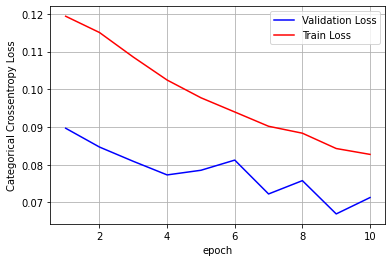

In [31]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Conv Layers with Kernel size 5

In [ ]:
Conv2D??

In [32]:
model = Sequential()
kernel=5
conv_1 = Conv2D(filters=32, kernel_size=kernel, input_shape = (input_shape), activation='relu')
conv_2 = Conv2D(filters=64, kernel_size=kernel, activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=kernel, activation='relu')

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()
max_pool_3 = AveragePooling2D()

zero_pad = ZeroPadding2D(padding=(5,5))
dropout_1 = Dropout(0.25)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
final = Dense(units=num_classes, activation='softmax')


model.add(conv_1)
model.add(max_pool_1)
model.add(conv_2)
model.add(max_pool_2)
model.add(zero_pad)
model.add(conv_3)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(final)

model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 1.2277 - accuracy: 0.6570 - val_loss: 0.2906 - val_accuracy: 0.9157
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2758 - accuracy: 0.9175 - val_loss: 0.1640 - val_accuracy: 0.9520
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1801 - accuracy: 0.9461 - val_loss: 0.1142 - val_accuracy: 0.9664
Epoch 4/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1393 - accuracy: 0.9582 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 5/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.1164 - accuracy: 0.9647 - val_loss: 0.0752 - val_accuracy: 0.9764
Epoch 6/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1012 - accuracy: 0.9698 - val_loss: 0.0715 - val_accuracy: 0.9768
Epoch 7/10
60000/60000 [==============================] - 5s 78us/st

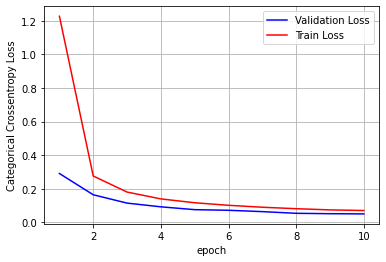

In [33]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Conv Layers with Kernel Size 2

In [34]:
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=(2,2), input_shape = (input_shape), activation='relu')
conv_2 = Conv2D(filters=63, kernel_size=(2,2), activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=(2,2), activation='relu')

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
final = Dense(units=num_classes, activation='softmax')


model.add(conv_1)
model.add(max_pool_1)
model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(final)

model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 1.3356 - accuracy: 0.6007 - val_loss: 0.4047 - val_accuracy: 0.8833
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4045 - accuracy: 0.8752 - val_loss: 0.2539 - val_accuracy: 0.9231
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2977 - accuracy: 0.9074 - val_loss: 0.2042 - val_accuracy: 0.9359
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2373 - accuracy: 0.9272 - val_loss: 0.1671 - val_accuracy: 0.9498
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1972 - accuracy: 0.9390 - val_loss: 0.1380 - val_accuracy: 0.9596
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1707 - accuracy: 0.9484 - val_loss: 0.1162 - val_accuracy: 0.9660
Epoch 7/10
60000/60000 [==============================] - 3s 50us/st

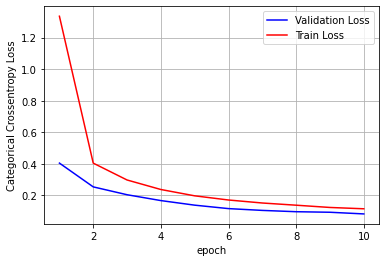

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Convolutional Layers

Kernel Size=2

In [36]:
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=(2,2), input_shape = input_shape, activation='relu')
conv_2 = Conv2D(filters=63, kernel_size=(2,2), activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=(2,2), activation='relu')
conv_4 = Conv2D(filters=256, kernel_size=(2,2), activation='relu')
conv_5 = Conv2D(filters=512, kernel_size=(2,2), activation='relu')

zero_pad = ZeroPadding2D(padding=(5,5))

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
final = Dense(units=num_classes, activation='softmax')

model.add(conv_1)
model.add(max_pool_1)
model.add(zero_pad)
model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(conv_4)
model.add(conv_5)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(final)

model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 1.4338 - accuracy: 0.5670 - val_loss: 0.3685 - val_accuracy: 0.8942
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.3436 - accuracy: 0.8928 - val_loss: 0.2170 - val_accuracy: 0.9352
Epoch 3/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.2343 - accuracy: 0.9270 - val_loss: 0.1642 - val_accuracy: 0.9503
Epoch 4/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1853 - accuracy: 0.9423 - val_loss: 0.1369 - val_accuracy: 0.9552
Epoch 5/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1533 - accuracy: 0.9523 - val_loss: 0.1175 - val_accuracy: 0.9626
Epoch 6/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1337 - accuracy: 0.9584 - val_loss: 0.1006 - val_accuracy: 0.9679
Epoch 7/10
60000/60000 [==============================] 

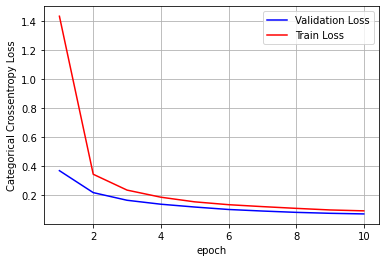

In [37]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Kernel Size=3

In [40]:
kernel=3
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=kernel, input_shape = input_shape, activation='relu')
conv_2 = Conv2D(filters=63, kernel_size=kernel, activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=kernel, activation='relu')
conv_4 = Conv2D(filters=256, kernel_size=kernel, activation='relu')
conv_5 = Conv2D(filters=512, kernel_size=kernel, activation='relu')

zero_pad = ZeroPadding2D(padding=(5,5))

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
final = Dense(units=num_classes, activation='softmax')

model.add(conv_1)
model.add(max_pool_1)
model.add(zero_pad)
model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(conv_4)
model.add(conv_5)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(final)

model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 1.2687 - accuracy: 0.6658 - val_loss: 0.2930 - val_accuracy: 0.9082
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2785 - accuracy: 0.9132 - val_loss: 0.1680 - val_accuracy: 0.9490
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1837 - accuracy: 0.9434 - val_loss: 0.1193 - val_accuracy: 0.9618
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1396 - accuracy: 0.9568 - val_loss: 0.0923 - val_accuracy: 0.9690
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1143 - accuracy: 0.9649 - val_loss: 0.0767 - val_accuracy: 0.9754
Epoch 6/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0960 - accuracy: 0.9703 - val_loss: 0.0696 - val_accuracy: 0.9770
Epoch 7/10
60000/60000 [==============================] - 7s 1

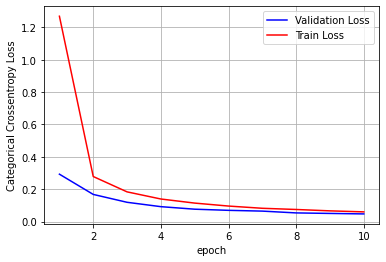

In [41]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [42]:
kernel=5
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=kernel, input_shape = input_shape, activation='relu')
conv_2 = Conv2D(filters=63, kernel_size=kernel, activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=kernel, activation='relu')
conv_4 = Conv2D(filters=256, kernel_size=kernel, activation='relu')
conv_5 = Conv2D(filters=512, kernel_size=kernel, activation='relu')

zero_pad = ZeroPadding2D(padding=(10,10))

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
final = Dense(units=num_classes, activation='softmax')

model.add(conv_1)
model.add(max_pool_1)
model.add(zero_pad)
model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(conv_4)
model.add(conv_5)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(final)

model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.9745 - accuracy: 0.7210 - val_loss: 0.2236 - val_accuracy: 0.9323
Epoch 2/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.2268 - accuracy: 0.9296 - val_loss: 0.1413 - val_accuracy: 0.9569
Epoch 3/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.1509 - accuracy: 0.9535 - val_loss: 0.0990 - val_accuracy: 0.9684
Epoch 4/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.1147 - accuracy: 0.9656 - val_loss: 0.0858 - val_accuracy: 0.9726
Epoch 5/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0933 - accuracy: 0.9712 - val_loss: 0.0674 - val_accuracy: 0.9791
Epoch 6/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0544 - val_accuracy: 0.9822
Epoch 7/10
60000/60000 [==============================] 

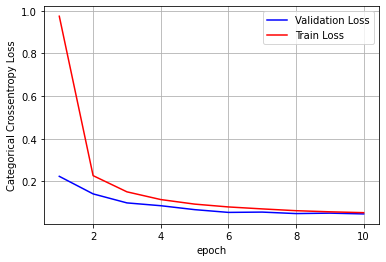

In [43]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

7 Convolutional Layers

Kernel size 2

In [44]:
kernel=2
epochs=4
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=kernel, input_shape = input_shape, activation='relu')
conv_2 = Conv2D(filters=64, kernel_size=kernel, activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=kernel, activation='relu')
conv_4 = Conv2D(filters=256, kernel_size=kernel, activation='relu')
conv_5 = Conv2D(filters=512, kernel_size=kernel, activation='relu')
conv_6 = Conv2D(filters=512, kernel_size=kernel, activation='relu')
conv_7 = Conv2D(filters=512, kernel_size=kernel, activation='relu')

zero_pad = ZeroPadding2D(padding=(24,24))

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
dense_2 = Dense(units=64, activation='relu')
final = Dense(units=num_classes, activation='softmax')

model.add(conv_1)
model.add(max_pool_1)
model.add(zero_pad)
model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(conv_4)
model.add(conv_5)
model.add(conv_6)
model.add(conv_7)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(dense_2)
model.add(dropout_2)
model.add(final)

model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 200s 3ms/step - loss: 0.4748 - accuracy: 0.8482 - val_loss: 0.0694 - val_accuracy: 0.9812
Epoch 2/4
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1302 - accuracy: 0.9695 - val_loss: 0.0571 - val_accuracy: 0.9841
Epoch 3/4
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0936 - accuracy: 0.9779 - val_loss: 0.0657 - val_accuracy: 0.9831
Epoch 4/4
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0792 - accuracy: 0.9808 - val_loss: 0.0445 - val_accuracy: 0.9883
Test loss: 0.04449258501893973
Test accuracy: 0.9883000254631042


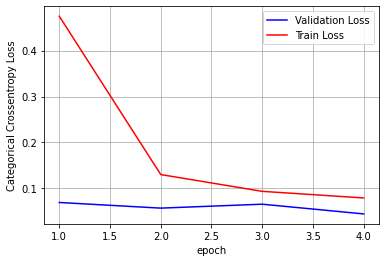

In [45]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Kernel Size: 3

In [46]:
kernel=3
epochs=5
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=kernel, input_shape = input_shape, activation='relu')
conv_2 = Conv2D(filters=64, kernel_size=kernel, activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=kernel, activation='relu')
conv_4 = Conv2D(filters=256, kernel_size=kernel, activation='relu')
conv_5 = Conv2D(filters=512, kernel_size=kernel, activation='relu')
conv_6 = Conv2D(filters=512, kernel_size=kernel, activation='relu')
conv_7 = Conv2D(filters=512, kernel_size=kernel, activation='relu')

zero_pad_1 = ZeroPadding2D(padding=(3,3))
zero_pad_2 = ZeroPadding2D(padding=(3,3))
zero_pad_3 = ZeroPadding2D(padding=(3,3))
zero_pad_4 = ZeroPadding2D(padding=(3,3))
zero_pad_5 = ZeroPadding2D(padding=(3,3))

max_pool_1 = MaxPooling2D()
max_pool_2 = MaxPooling2D()
max_pool_3 = MaxPooling2D()
max_pool_4 = MaxPooling2D()
max_pool_5 = MaxPooling2D()
max_pool_6 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
dense_2 = Dense(units=64, activation='relu')
final = Dense(units=num_classes, activation='softmax')

model.add(conv_1)
model.add(max_pool_1)
model.add(conv_2)
model.add(max_pool_2)
model.add(conv_3)
model.add(max_pool_3)
model.add(zero_pad_4)
model.add(conv_4)
model.add(max_pool_4)
model.add(zero_pad_5)
model.add(conv_5)
model.add(max_pool_5)
model.add(zero_pad_1)
model.add(conv_6)
model.add(max_pool_6)
model.add(zero_pad_2)
model.add(conv_7)
model.add(zero_pad_3)
model.add(flatten)
model.add(dense_1)
model.add(dropout_1)
model.add(dense_2)
model.add(dropout_2)
model.add(final)

model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 517us/step - loss: 1.3812 - accuracy: 0.4629 - val_loss: 0.2774 - val_accuracy: 0.9295
Epoch 2/5
60000/60000 [==============================] - 30s 499us/step - loss: 0.2413 - accuracy: 0.9414 - val_loss: 0.1078 - val_accuracy: 0.9721
Epoch 3/5
60000/60000 [==============================] - 30s 498us/step - loss: 0.1457 - accuracy: 0.9674 - val_loss: 0.1172 - val_accuracy: 0.9754
Epoch 4/5
60000/60000 [==============================] - 30s 498us/step - loss: 0.1144 - accuracy: 0.9747 - val_loss: 0.0893 - val_accuracy: 0.9799
Epoch 5/5
60000/60000 [==============================] - 30s 498us/step - loss: 0.0922 - accuracy: 0.9792 - val_loss: 0.0950 - val_accuracy: 0.9823
Test loss: 0.09495201612031369
Test accuracy: 0.9822999835014343


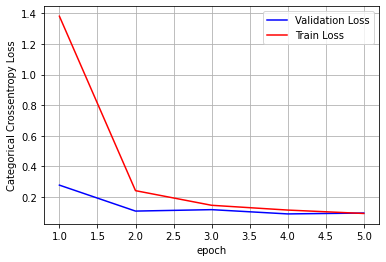

In [47]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Kernel Size: 5

In [48]:
kernel=5
epochs=5
model = Sequential()
conv_1 = Conv2D(filters=32, kernel_size=kernel, input_shape = input_shape, activation='relu')
conv_2 = Conv2D(filters=64, kernel_size=kernel, activation='relu')
conv_3 = Conv2D(filters=128, kernel_size=kernel, activation='relu')
conv_4 = Conv2D(filters=256, kernel_size=kernel, activation='relu')
conv_5 = Conv2D(filters=512, kernel_size=kernel, activation='relu')
conv_6 = Conv2D(filters=512, kernel_size=kernel, activation='relu')
conv_7 = Conv2D(filters=512, kernel_size=kernel, activation='relu')

zero_pad_0 = ZeroPadding2D(padding=(5,5))
zero_pad_1 = ZeroPadding2D(padding=(5,5))
zero_pad_2 = ZeroPadding2D(padding=(5,5))
zero_pad_3 = ZeroPadding2D(padding=(5,5))
zero_pad_4 = ZeroPadding2D(padding=(5,5))
zero_pad_5 = ZeroPadding2D(padding=(5,5))

max_pool_1 = MaxPooling2D()
avg_pool_2 = AveragePooling2D()
max_pool_3 = MaxPooling2D()
avg_pool_4 = AveragePooling2D()
max_pool_5 = MaxPooling2D()
max_pool_6 = MaxPooling2D()

dropout_1 = Dropout(0.25)
dropout_2 = Dropout(0.50)

flatten = Flatten()
dense_1 = Dense(units=128, activation='relu')
dense_2 = Dense(units=64, activation='relu')
dense_3 = Dense(units=32, activation='relu')
final = Dense(units=num_classes, activation='softmax')

model.add(conv_1)
model.add(max_pool_1)
model.add(conv_2)
model.add(avg_pool_2)
model.add(zero_pad_0)
model.add(conv_3)
model.add(max_pool_3)
model.add(zero_pad_1)
model.add(conv_4)
model.add(avg_pool_4)
model.add(zero_pad_2)
model.add(conv_5)
model.add(max_pool_5)
model.add(zero_pad_3)
model.add(conv_6)
model.add(max_pool_6)
model.add(zero_pad_4)
model.add(conv_7)
model.add(zero_pad_5)
model.add(flatten)
model.add(dense_1)
model.add(dense_2)
model.add(dense_3)
model.add(final)

model.compile(optimizer='sgd', loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x=x_train, y=ytr, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, yte), verbose=1)

score = model.evaluate(x_test, yte, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 96s 2ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/5
60000/60000 [==============================] - 94s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/5
60000/60000 [==============================] - 94s 2ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 4/5
60000/60000 [==============================] - 94s 2ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3007 - val_accuracy: 0.1135
Epoch 5/5
60000/60000 [==============================] - 94s 2ms/step - loss: 2.3008 - accuracy: 0.1124 - val_loss: 2.3006 - val_accuracy: 0.1135
Test loss: 2.3005532260894777
Test accuracy: 0.11349999904632568


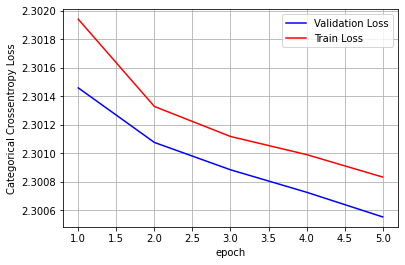

In [49]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)